<a href="https://www.kaggle.com/code/toddgardiner/s4e9-eda-data-verification-sm-regression?scriptVersionId=206053196" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Car Prices - Exploratory Data Analysis
## Season 4 Episode 9 of the Playground Series 
Last month I used someone else's EDA and jumped directly to modeling. This month I'm paying that favor back. Feel free to use this code as you see fit. Good luck in the competition...

In [1]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sbs
from sklearn.model_selection import train_test_split, KFold
import warnings
warnings.filterwarnings("ignore") #seaborn is loud...
import statsmodels.formula.api as smf

# Import Data & Cursory Look

In [2]:
#import data
df = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
dft = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

In [3]:
#what do the shapes look like?
df.shape, dft.shape
#shapes should be one column off to accomodate for price...
# 1.8M Training rows is great, 125K test rows -> ~10%

((188533, 13), (125690, 12))

In [4]:
# visual of train
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [5]:
# visual of test
dft.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


# Plot Uniques

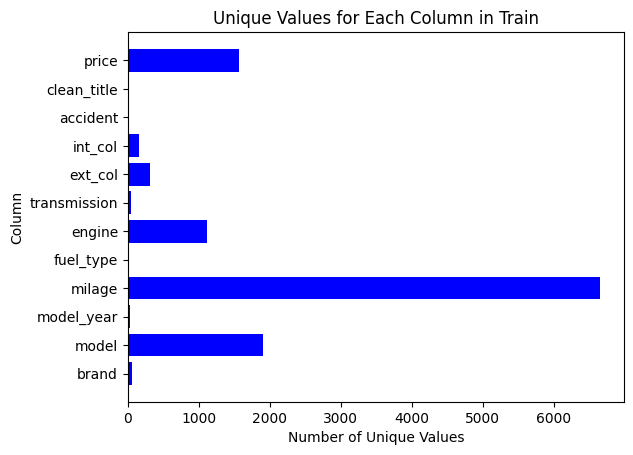

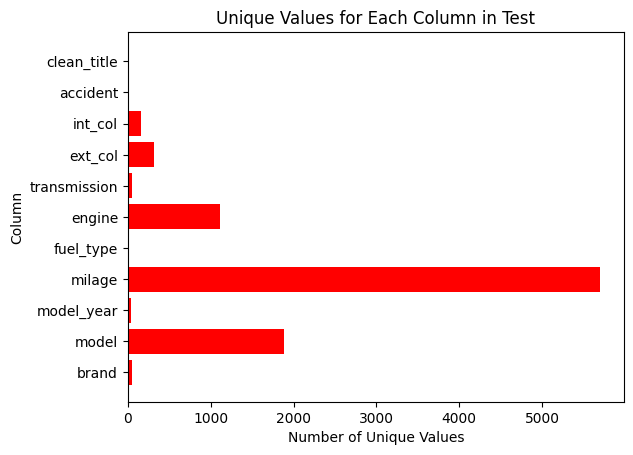

In [6]:
#lets see how many uniques we have in each column
#list of columns
cc = list(df.columns)
# empty variables 
cu, ctu = [], []
#populate those variables
for column in cc:
    if column != 'id':
        cu.append(df[column].nunique())
        if column != "price":
            ctu.append(dft[column].nunique())

#horizontal bar plots
plt.barh([x for x in cc if x!= 'id'],cu,color='b') 
plt.ylabel("Column")
plt.xlabel('Number of Unique Values')
plt.title('Unique Values for Each Column in Train')
# plt.tight_layout()
plt.show()

plt.barh([x for x in cc if x!= 'id' and x != 'price'],ctu,color='r')
plt.ylabel("Column")
plt.xlabel('Number of Unique Values')
plt.title('Unique Values for Each Column in Test')
# plt.tight_layout()
plt.show()

In [7]:
#Which columns are numerical?
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


# Correlation Matrices

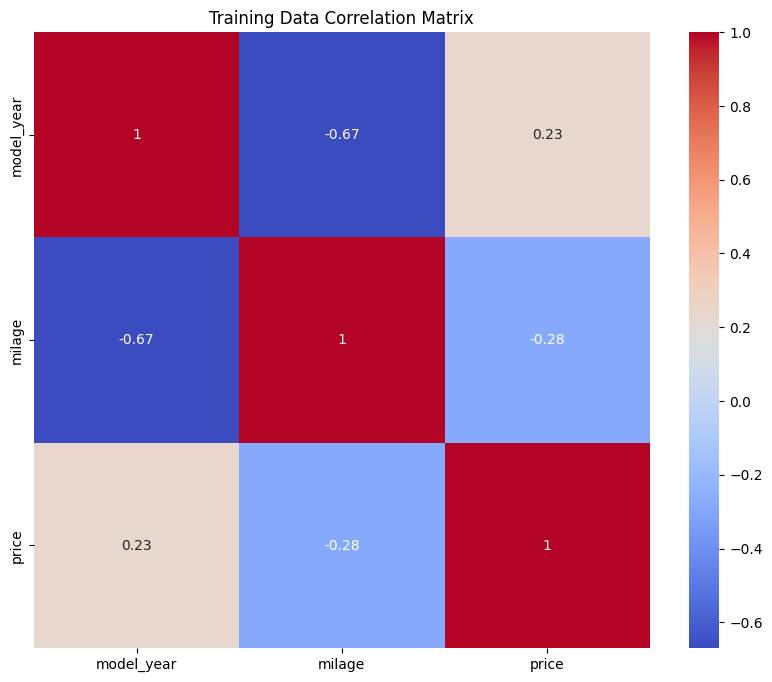

In [8]:
# calculate the correlation matrix for numerical values
corr_matrix = df[['model_year','milage','price']].corr()

# create a heatmap plot
plt.figure(figsize=(10, 8))
sbs.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# add a title
plt.title('Training Data Correlation Matrix')

# show the plot
plt.show()

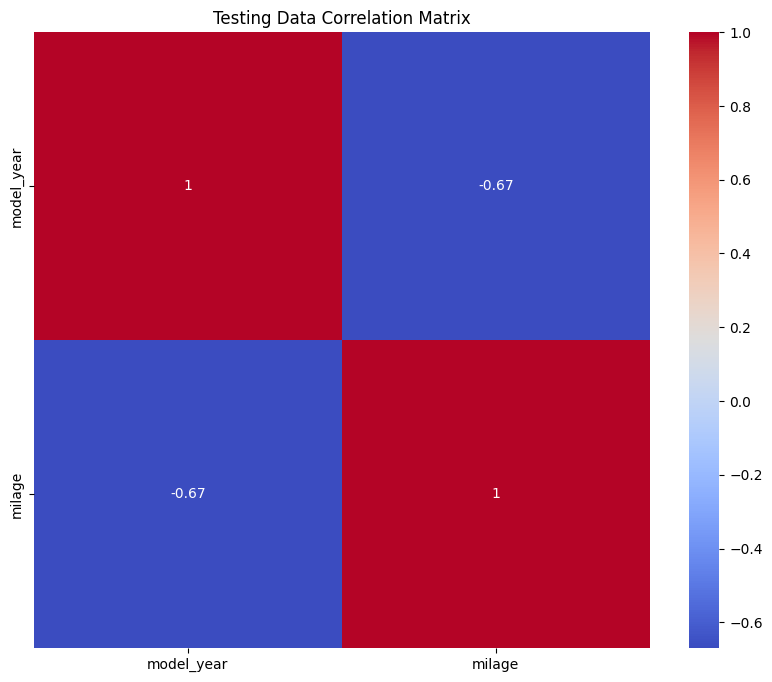

In [9]:
#compare the testing data matrix parts that we have...

# calculate the correlation matrix
corrt_matrix = df[['model_year','milage']].corr()

# create a heatmap plot
plt.figure(figsize=(10, 8))
sbs.heatmap(corrt_matrix, annot=True, cmap='coolwarm', square=True)

# add a title
plt.title('Testing Data Correlation Matrix')

# show the plot
plt.show()

# Nulls Analysis

In [10]:
#how many nulls in training data?
df.isna().sum()
#great, electrics don't have fuel, accidents happen, and titles are living documents

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [11]:
#how many nulls in test data
dft.isna().sum()
#great, electrics don't have fuel, accidents happen, and titles are living documents

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

# Characterize Train Data

In [12]:
#make a list of the columns
cols = df.columns

#Make a dictionary for later
dfstuff = dict()

#see totals and some uniques from each column
for i in range(len(cols)):
    #See the output
    print(f"{cols[i]} , Uniques: {len(df[cols[i]].unique())} , Ten Examples :\n {df[cols[i]].unique().tolist()[0:10]}\n\n")
    #populate the dictionary
    dfstuff[cols[i]] = df[cols[i]].unique().tolist()

id , Uniques: 188533 , Ten Examples :
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


brand , Uniques: 57 , Ten Examples :
 ['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi', 'Ford', 'BMW', 'Tesla', 'Cadillac']


model , Uniques: 1897 , Ten Examples :
 ['Cooper S Base', 'LS V8', 'Silverado 2500 LT', 'G90 5.0 Ultimate', 'Metris Base', 'A6 2.0T Sport', 'A8 L 3.0T', 'Silverado 1500 1LZ', 'F-150 XLT', 'M4 Base']


model_year , Uniques: 34 , Ten Examples :
 [2007, 2002, 2017, 2021, 2018, 2016, 2020, 2015, 2011, 2013]


milage , Uniques: 6651 , Ten Examples :
 [213000, 143250, 136731, 19500, 7388, 40950, 62200, 102604, 38352, 74850]


fuel_type , Uniques: 8 , Ten Examples :
 ['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel', 'Plug-In Hybrid', '–', 'not supported']


engine , Uniques: 1117 , Ten Examples :
 ['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel', '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel', '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability', '420.0HP 5.0L 8 Cylinder Eng

# Characterize Test Data

In [13]:
#make a list of the columns
colst = dft.columns
#Make a dictionary for later
dftstuff = dict()

#see totals and some uniques from each column
for i in range(len(colst)):
    #See the output
    print(f"{colst[i]} , Uniques: {len(dft[colst[i]].unique())} , Ten Examples :\n {dft[colst[i]].unique().tolist()[0:10]}\n\n")
    #populate the dictionary
    dftstuff[colst[i]] = dft[colst[i]].unique().tolist()

id , Uniques: 125690 , Ten Examples :
 [188533, 188534, 188535, 188536, 188537, 188538, 188539, 188540, 188541, 188542]


brand , Uniques: 55 , Ten Examples :
 ['Land', 'Ford', 'Audi', 'Chevrolet', 'Lexus', 'Mercedes-Benz', 'Genesis', 'Mazda', 'Porsche', 'Jaguar']


model , Uniques: 1891 , Ten Examples :
 ['Rover LR2 Base', 'Rover Defender SE', 'Expedition Limited', 'A6 2.0T Sport', 'A6 2.0T Premium Plus', 'Express 2500 Work Van', 'RX 350 Base', 'Impala 1LT', 'S-Class S 63 AMG', 'G80 3.3T Sport']


model_year , Uniques: 36 , Ten Examples :
 [2015, 2020, 2022, 2016, 2018, 2013, 2008, 2019, 2017, 2002]


milage , Uniques: 5700 , Ten Examples :
 [98000, 9142, 28121, 61258, 59000, 99524, 194000, 40208, 7600, 63300]


fuel_type , Uniques: 8 , Ten Examples :
 ['Gasoline', 'Hybrid', 'Diesel', 'E85 Flex Fuel', nan, 'Plug-In Hybrid', '–', 'not supported']


engine , Uniques: 1117 , Ten Examples :
 ['240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel', '395.0HP 3.0L Straight 6 Cylinder Engine Gasoline

# Validate Test Data

In [14]:
#create a list of columns to check the data inside...
colstocheck = list(dftstuff.keys())
colstocheck.pop(0) #pop the id column
colstocheck.pop(3) #pop the mileage column

#see if any of the uniques in test are not in train...
for i in range(len(colstocheck)):
    print(f"\n\nChecking {colstocheck[i]} values...")
    for j in dftstuff[colstocheck[i]]:
        if j not in dfstuff[colstocheck[i]]:
            print(f"{i}:{j} is not in training data.")
            
#okay, most of the test data is represented in the training set... which is great...
#engines will need some cleaning, years aren't all represented (supports regression task)
#and models may need some cleaning too 



Checking brand values...


Checking model values...
1:allroad 2.7T is not in training data.


Checking model_year values...
2:1982 is not in training data.
2:1988 is not in training data.


Checking fuel_type values...


Checking engine values...
4:177.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas is not in training data.


Checking transmission values...


Checking ext_col values...


Checking int_col values...


Checking accident values...


Checking clean_title values...


In [15]:
# find the options for years in the train data...
sorted(list(df.model_year.unique()))

[1974,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024]

# See the Data

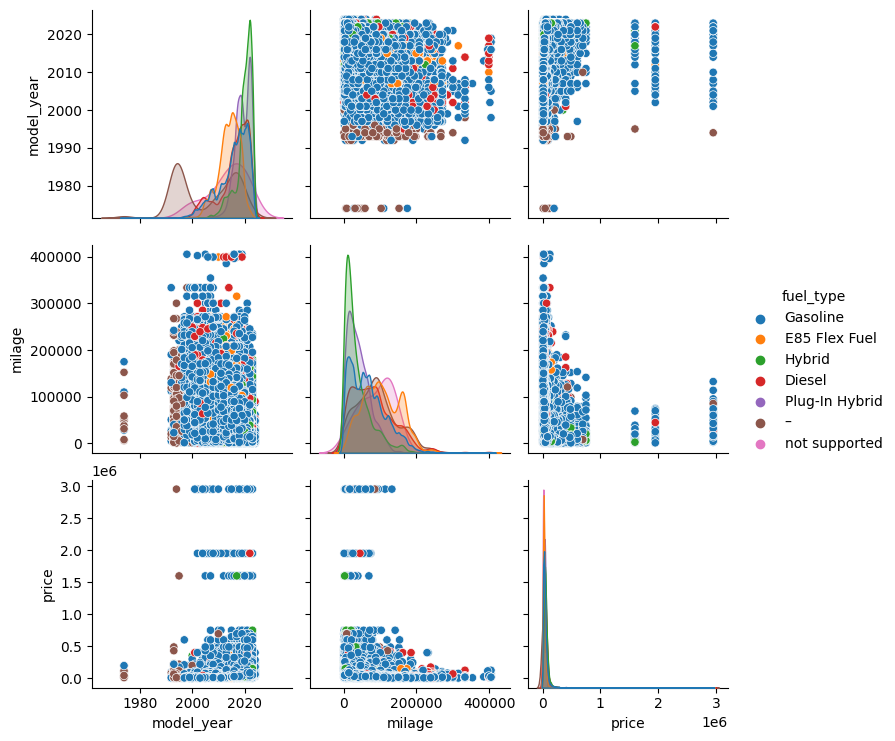

In [16]:
# Lets see that training data...
sbs.pairplot(df.iloc[:,1:13], diag_kind="kde", hue="fuel_type", diag_kws=dict(common_norm=False))


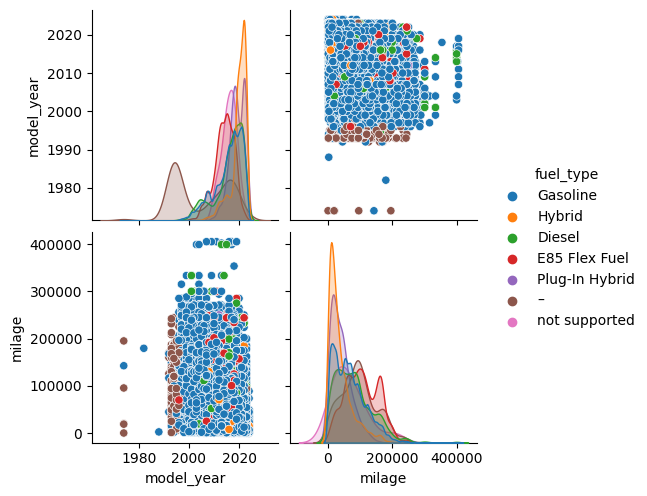

In [17]:
# Lets see that testing data...
sbs.pairplot(dft.iloc[:,1:12], diag_kind="kde", hue="fuel_type", diag_kws=dict(common_norm=False))


# Build a Simple Regression

In [18]:
#this is an eda, so I won't clean the data, add cv folds, traintest split, etc...
#here is a basic regression in R syntax... 
model1 = smf.ols(formula="price ~ C(brand) + C(model) + C(model_year) + \
                            milage + C(engine) + C(fuel_type) + C(accident) +C(clean_title) \
                            ", data=df).fit()


In [19]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     9.859
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        01:50:50   Log-Likelihood:            -2.0452e+06
No. Observations:              162610   AIC:                         4.097e+06
Df Residuals:                  159538   BIC:                         4.127e+06
Df Model:                        3071                                         
Covariance Type:            nonrobust                                         
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [20]:
# get the 1900+ coefficients into a dataframe
coefs = pd.DataFrame(model1.params)
coefs.iloc[0:40,:]

,0
Intercept,71201.469806
C(brand)[T.Alfa],-24685.074777
C(brand)[T.Aston],69749.046792
C(brand)[T.Audi],8241.201584
C(brand)[T.BMW],-436.016808
C(brand)[T.Bentley],102638.548442
C(brand)[T.Bugatti],159506.917390
C(brand)[T.Buick],-3391.269860
C(brand)[T.Cadillac],2759.368939
C(brand)[T.Chevrolet],431.853212


# Fix Invalidated Test Data


In [21]:
# # to predict with out basic regression, we can have no data in the test set not in the train set...
# # we found these above, now we'll fix them

# # where is this one?
# dft.loc[dft.model == "allroad 2.7T"]

# # What are our replacement options?
# df.loc[df.model.str.contains('allroad')]

# fix it...
dft.at[95044, 'model'] = 'allroad 2.0T Prestige'




In [22]:
# # 1982 & 1988 are in the test set, but not the training set. 
# # We can roll them up or down to any of the unique values in the training data. (Scroll up to see them...)

# Locate the offending records...
dft.loc[dft['model_year'] == 1982] #43235
dft.loc[dft['model_year'] == 1988] #119614

# Fix the offending records.
dft.at[43235, 'model_year']= 1974
dft.at[119614, 'model_year']= 1999

In [23]:
# set pandas options so we can see the output
pd.options.display.max_colwidth = 200

# lets look at sportage motors
sportages = df.engine.loc[(df.brand=='Kia')& (df.model.str.contains('Sportage'))]
# Thats too many, let's filter for hybrids...

# These are in the training set...
sportages.loc[sportages.str.contains('Hybrid')]


1443            2.0L I4 16V GDI DOHC Hybrid
101245    1.6L I4 16V GDI DOHC Turbo Hybrid
Name: engine, dtype: object

In [24]:
# # These are the 4 that must be updated...
dft.loc[dft.engine =="177.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas"]
# # This article says the plug in hybrids have more power and less gas mileage...
# # I'm making the executive decision to add the more expensive motor above (2.0L I4)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
54866,243399,Kia,Sportage Plug-In Hybrid X-Line,2023,5500,Gasoline,177.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas,A/T,White,Black,None reported,Yes
105633,294166,Kia,Sportage Plug-In Hybrid X-Line,2015,156350,Plug-In Hybrid,177.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas,A/T,White,White,At least 1 accident or damage reported,Yes
111992,300525,Chevrolet,Sportage Plug-In Hybrid X-Line,2023,1340,Plug-In Hybrid,177.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas,9-Speed A/T,Black,Black,None reported,Yes
117012,305545,Kia,Sportage Plug-In Hybrid X-Line,2022,1340,Gasoline,177.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas,A/T,Gray,Black,None reported,Yes


In [25]:
# Plug the new motor into the test set...
dft.at[54866, 'engine'] = '2.0L I4 16V GDI DOHC Hybrid'
dft.at[105633, 'engine'] = '2.0L I4 16V GDI DOHC Hybrid'
dft.at[111992, 'engine'] = '2.0L I4 16V GDI DOHC Hybrid'
dft.at[117012, 'engine'] = '2.0L I4 16V GDI DOHC Hybrid'

# Run Predictions

In [26]:
#predict the test set
outputs = model1.predict(dft)
#see ten of them
outputs[0:10]


0    22858.374253
1    65502.767468
2             NaN
3             NaN
4    30844.411140
5    20088.254702
6     1947.343613
7    39941.123012
8    53903.131145
9    27731.689871
dtype: float64

In [27]:
# add a correction for scrap value
for i in range(len(outputs)):
    if outputs[i] < 10 or np.isnan(outputs[i]):
        outputs[i] = 10
    else:
        outputs[i]= round(outputs[i],2)

In [28]:
#make the dataframe, then output the submission.csv
outs = pd.DataFrame({'id':dft.id, 'price':outputs})

outs.to_csv('submission.csv',index=False)

In [29]:
#inspect the csv
!head /kaggle/working/submission.csv

id,price
188533,22858.37
188534,65502.77
188535,10.0
188536,10.0
188537,30844.41
188538,20088.25
188539,1947.34
188540,39941.12
188541,53903.13


Hopefully there is some code or insights in there that help you this month. 

Happy Kaggling!!